In [1]:
%matplotlib inline
import sys, os
import numpy as np
import pandas as pd
import skimage.io as sio
import skimage.transform as strans
import matplotlib.pyplot as plt
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import lib.pca as pca
import lib.util as util

base = os.path.join(os.getcwd(), "data")
dirs = os.listdir(base)
paths, names = util.get_people(base, dirs)
imgs, t_imgs = util.load_images(paths)
for i, p in enumerate(imgs):
    print(names[i] + ": " + str(len(p)) + " (images)")

Tony_Blair: 143 (images)
Gerhard_Schroeder: 108 (images)
George_W_Bush: 529 (images)
Hugo_Chavez: 70 (images)
Colin_Powell: 235 (images)
Ariel_Sharon: 76 (images)
Donald_Rumsfeld: 120 (images)


In [2]:
m = []
for p in imgs:
    for img in p:
        m.append(util.stack_image(img))

t_m = []
for img in t_imgs:
    t_m.append(util.stack_image(img))

### First 150 eigenvalues:

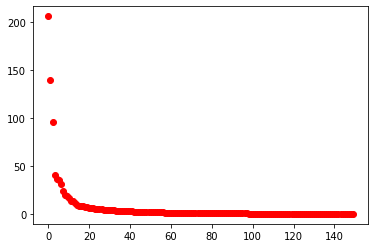

In [3]:
def compute_eigenvalue(s):
    return (s * s) / (len(m) - 1)

u, s, vh = pca.calc_pca(pd.DataFrame(np.array(m)))
plt.plot(np.vectorize(compute_eigenvalue)(s[:150]), 'ro')

The first 10 to 12 principal components declare most of the cumulative variance.

### First 12 eigenfaces:

/home/me/.local/lib64/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


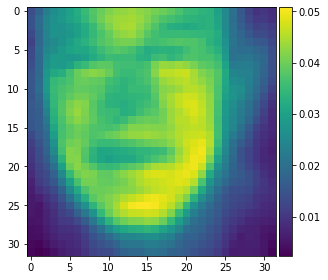

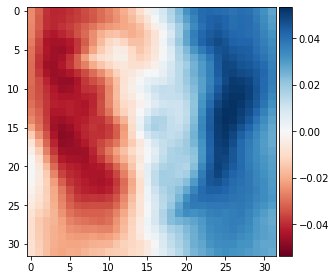

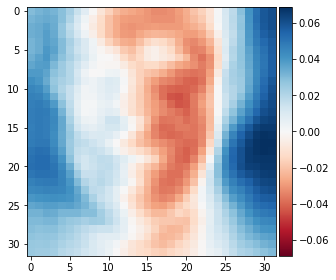

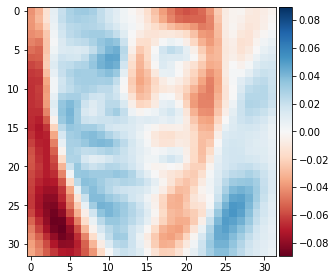

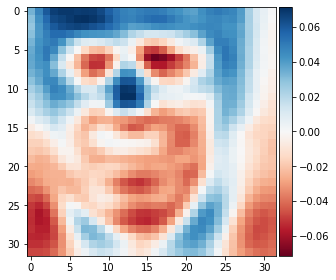

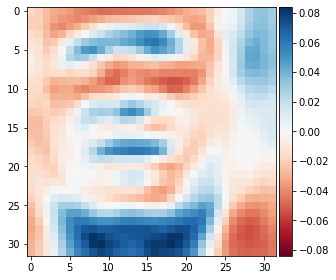

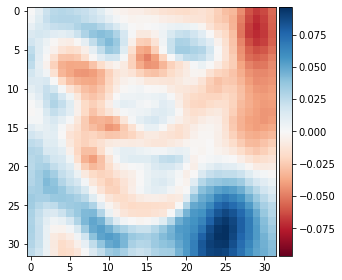

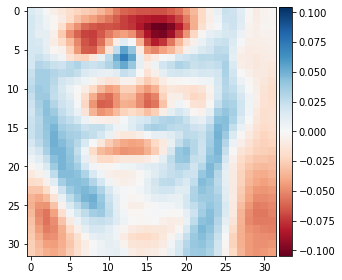

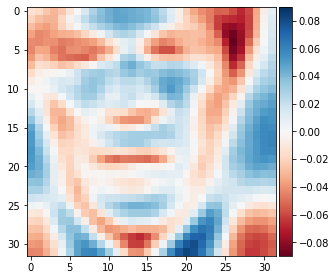

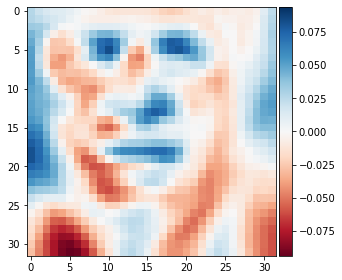

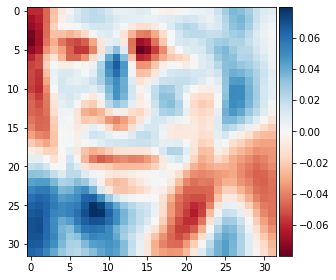

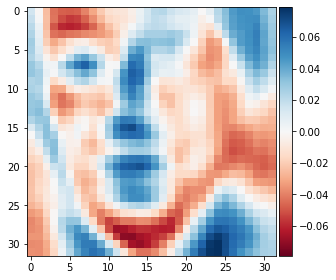

In [4]:
efs = vh[:12]
for ef in efs:
    sio.imshow(util.unstack_image(ef, 32))
    sio.show()

The eigenfaces show the attributes which are most common among all images.

### Face detection:

In [5]:
s_diag = np.diag(s)
us = u @ s_diag
train = us[:,:7]
train.shape

(1281, 7)

In [6]:
pd_m = pd.DataFrame(m)
for col in pd_m:
    for j in range(len(t_m)):
        t_m[j][col] = t_m[j][col] - pd_m[col].mean()

In [7]:
proj = t_m @ vh.T
test = proj[:,:7]
test.shape

(7, 7)

In [8]:
for n in range(7):
    dist = []
    for x in train:
        dist.append(np.linalg.norm(x - test[n]))
    
    min_val = 99999999999
    min_val_idx = -1
    for i, v in enumerate(dist):
        if min_val > v:
            min_val = v
            min_val_idx = i
        
    idx = -1
    cumsum = 0
    while cumsum < min_val_idx:
        idx += 1
        cumsum += len(imgs[idx])
        
    print("Test image " + str(n + 1) + " (label/classified): " + names[n] + "/" + names[idx] + ".")

Test image 1 (label/classified): Tony_Blair/Gerhard_Schroeder.
Test image 2 (label/classified): Gerhard_Schroeder/Ariel_Sharon.
Test image 3 (label/classified): George_W_Bush/George_W_Bush.
Test image 4 (label/classified): Hugo_Chavez/Hugo_Chavez.
Test image 5 (label/classified): Colin_Powell/Ariel_Sharon.
Test image 6 (label/classified): Ariel_Sharon/Ariel_Sharon.
Test image 7 (label/classified): Donald_Rumsfeld/Ariel_Sharon.
